<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Missing-value-treatment" data-toc-modified-id="Missing-value-treatment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing value treatment</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Model-train-and-test" data-toc-modified-id="Model-train-and-test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model train and test</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Problem statement



# Data description




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('beijing_train.csv')

In [3]:
df.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 52.4+ MB


In [3]:
df.drop(columns='REF_NO',inplace=True)


In [4]:
df.rename(columns = {'PM2.5': 'pollution'}, inplace = True)

In [5]:
# change int columns to category
cols = ['year','month','hour','day','wd','station']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   year       403776 non-null  category
 1   month      403776 non-null  category
 2   day        403776 non-null  category
 3   hour       403776 non-null  category
 4   pollution  395301 non-null  float64 
 5   PM10       397554 non-null  float64 
 6   SO2        395000 non-null  float64 
 7   NO2        391917 non-null  float64 
 8   CO         383515 non-null  float64 
 9   O3         390769 non-null  float64 
 10  TEMP       403512 non-null  float64 
 11  PRES       403511 non-null  float64 
 12  DEWP       403507 non-null  float64 
 13  RAIN       403515 non-null  float64 
 14  wd         402387 non-null  category
 15  WSPM       403538 non-null  float64 
 16  station    403776 non-null  category
dtypes: category(6), float64(11)
memory usage: 36.2 MB


In [32]:
df.describe()

,pollution,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.00000
mean,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.71838
std,78.311682,89.439222,21.501905,34.257473,1095.714921,56.444261,11.299838,10.353379,13.612736,0.837574,1.23760
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.00000
25%,21.000000,37.000000,2.284800,24.000000,500.000000,12.000000,4.000000,1002.000000,-8.000000,0.000000,0.90000
50%,57.000000,84.000000,7.000000,44.000000,900.000000,48.000000,15.400000,1009.800000,4.100000,0.000000,1.40000
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,82.000000,23.500000,1018.300000,15.500000,0.000000,2.20000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.20000


In [13]:
zero_values = (df == 0).sum()
zero_values

year              0
month             0
day               0
hour          16824
pollution         0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP           2642
PRES              0
DEWP            828
RAIN         387119
wd                0
WSPM          10891
station           0
dtype: int64

# Missing value treatment

In [20]:
df.isnull().sum()

year             0
month            0
day              0
hour             0
pollution     8475
PM10          6222
SO2           8776
NO2          11859
CO           20261
O3           13007
TEMP           264
PRES           265
DEWP           269
RAIN           261
wd            1389
WSPM           238
station          0
dtype: int64

In [6]:
num=['pollution','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

In [7]:
cat=['year','month','day','hour','wd','station']

In [8]:
df = df.fillna(df[(num)].mean())

In [9]:
df['wd']=df['wd'].fillna(df['wd'].mode()[0])

In [12]:
df.isnull().sum()

year         0
month        0
day          0
hour         0
pollution    0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
dtype: int64

# EDA

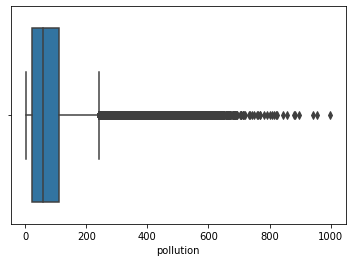

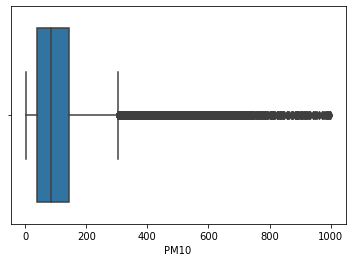

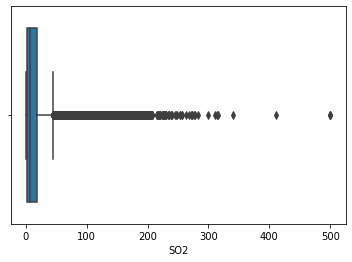

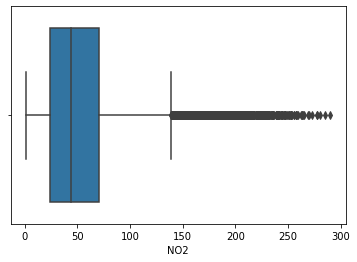

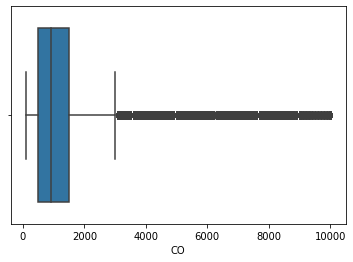

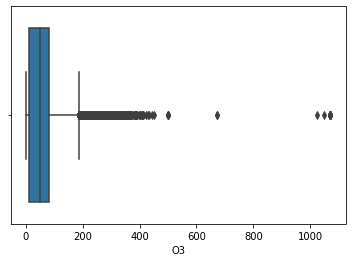

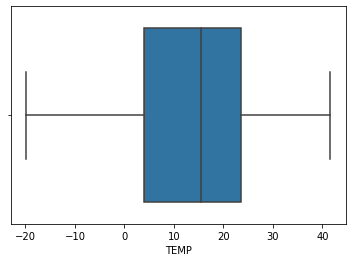

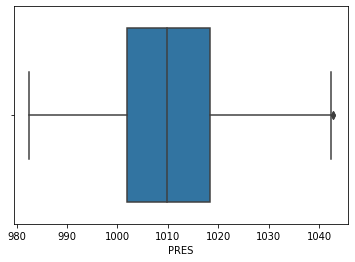

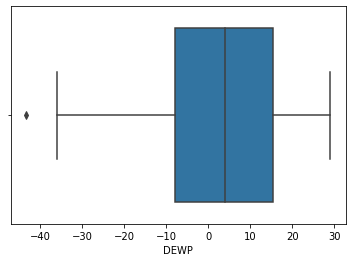

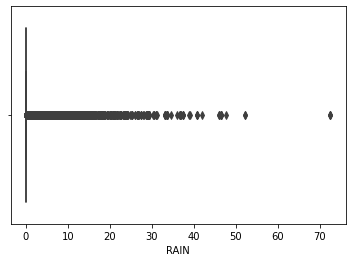

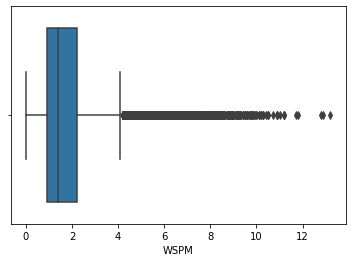

In [14]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.boxplot(df[col])

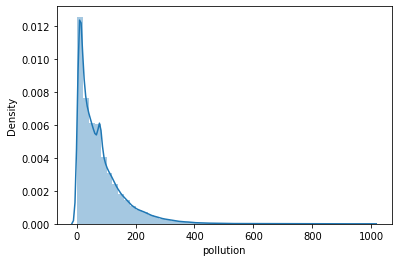

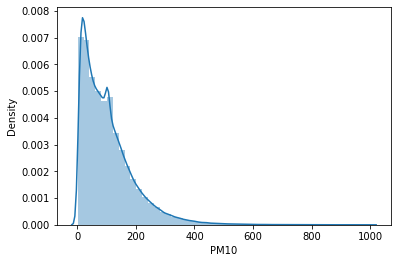

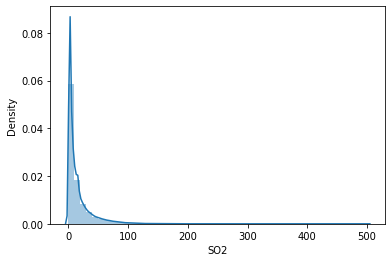

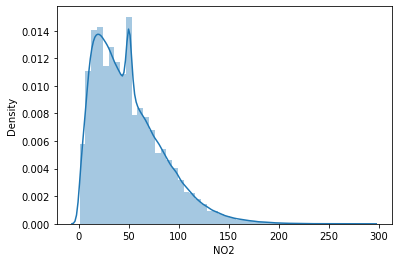

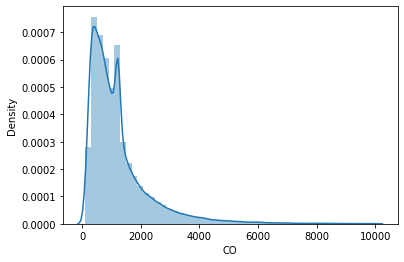

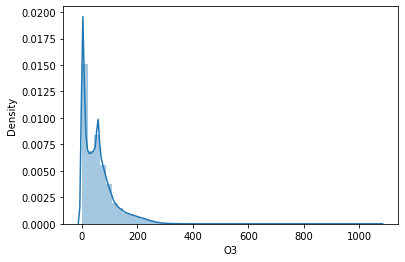

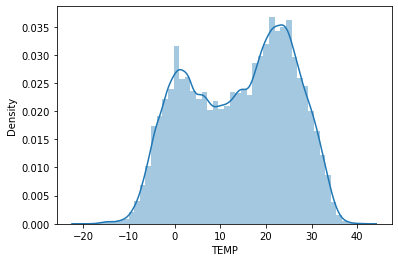

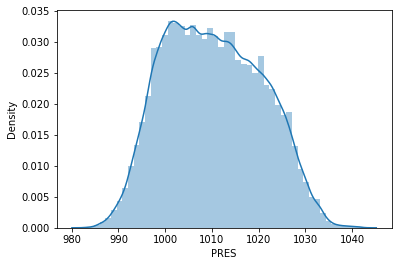

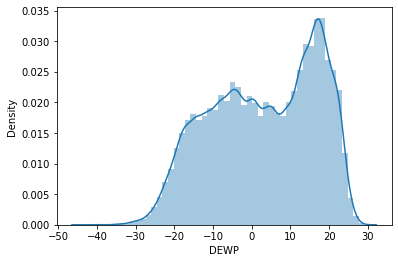

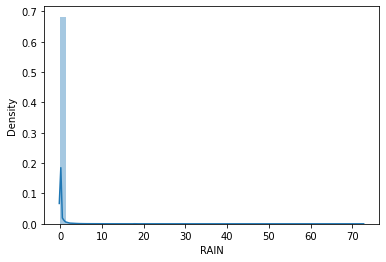

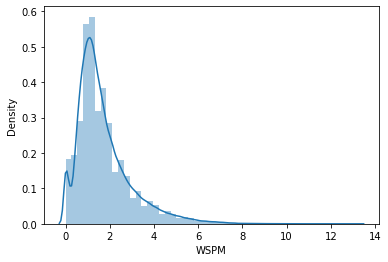

In [13]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.distplot(df[col])

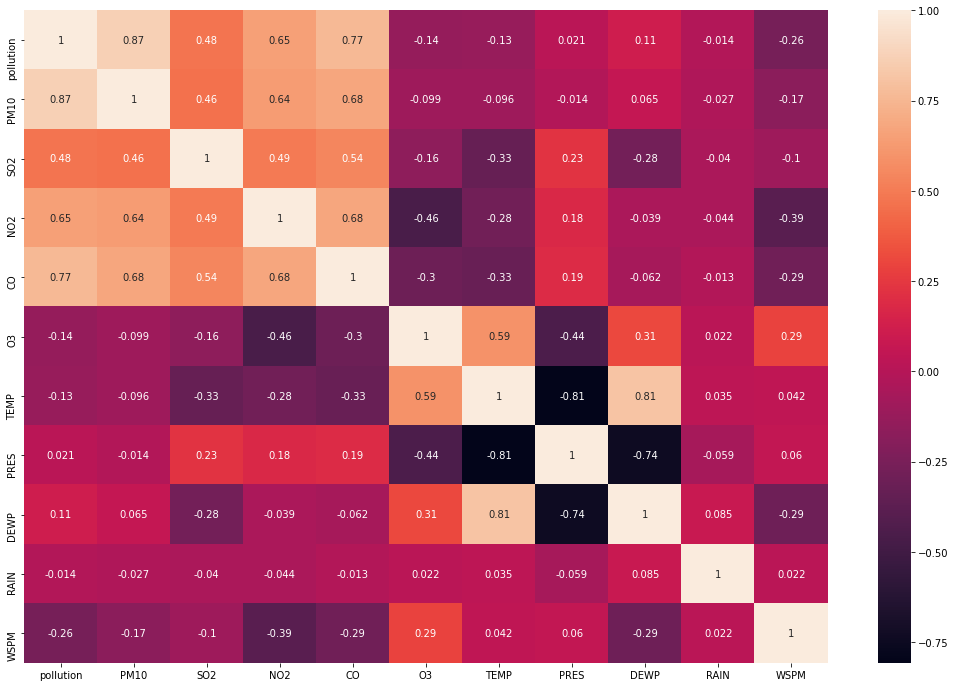

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(corr,data=df,annot=True)


[Text(0.5, 1.0, 'pollution during different years')]

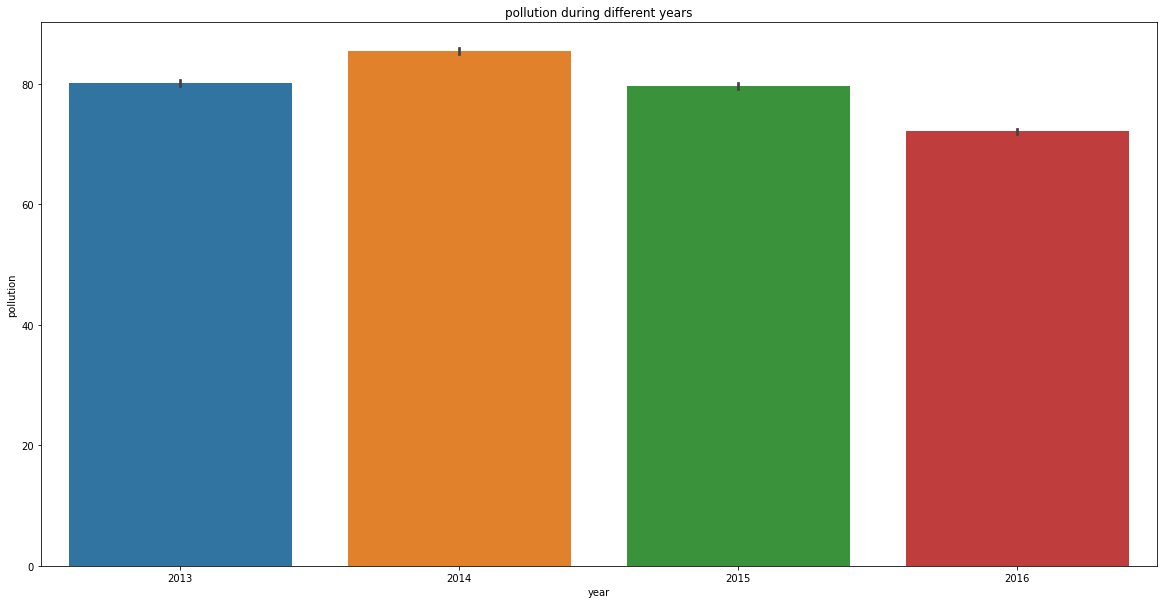

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='year', y='pollution', ax=ax)
ax.set(title='pollution during different years')

[Text(0.5, 1.0, 'pollution during different months')]

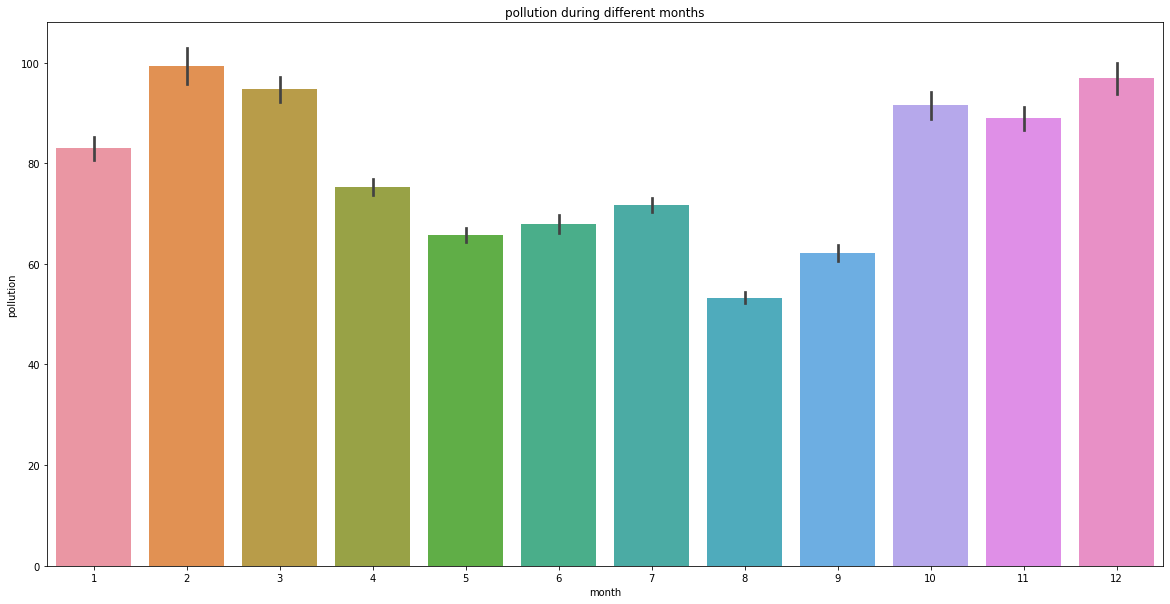

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='pollution', ax=ax)
ax.set(title='pollution during different months')

[Text(0.5, 1.0, 'pollution during different days')]

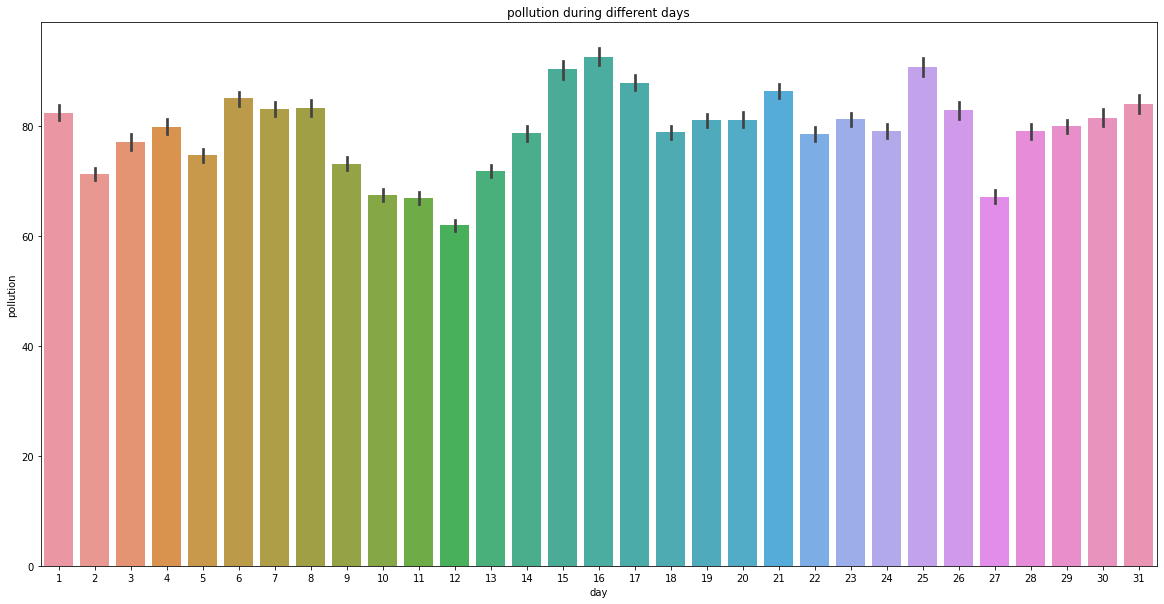

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='day', y='pollution', ax=ax)
ax.set(title='pollution during different days')

[Text(0.5, 1.0, 'pollution during different hours')]

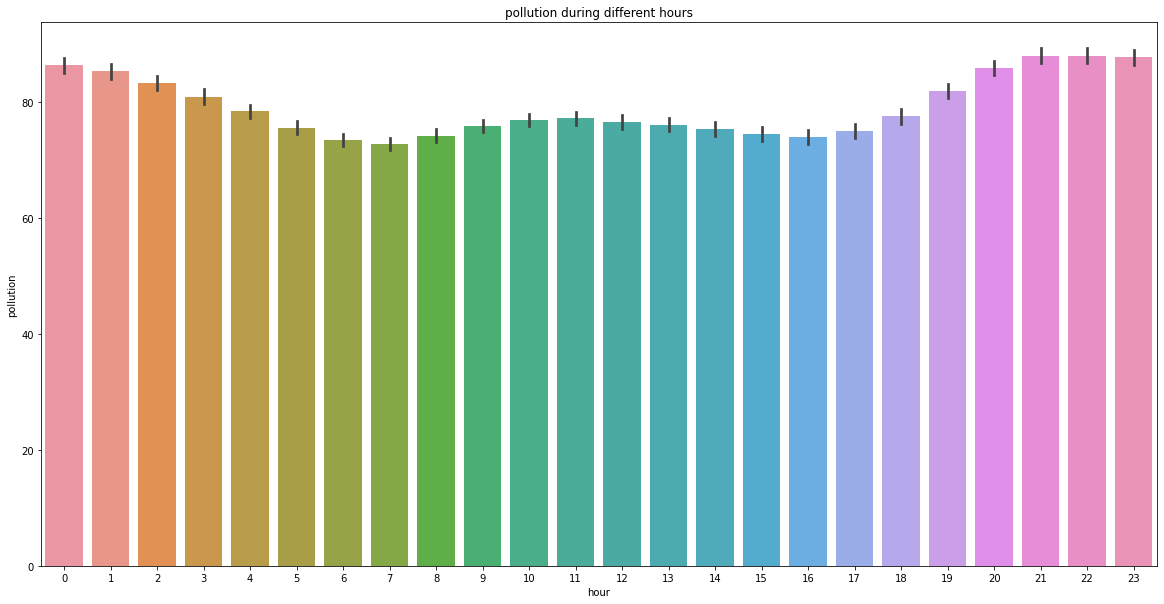

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='hour', y='pollution', ax=ax)
ax.set(title='pollution during different hours')

[Text(0.5, 1.0, 'pollution in different wind directions')]

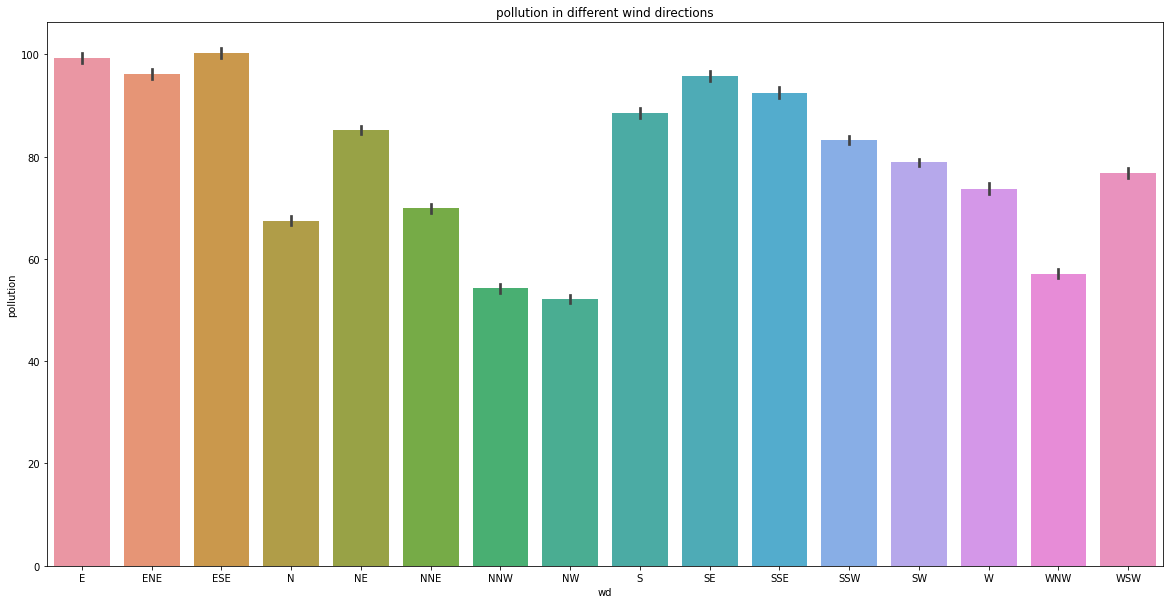

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='wd', y='pollution', ax=ax)
ax.set(title='pollution in different wind directions')

[Text(0.5, 1.0, 'pollution recorded by different stations')]

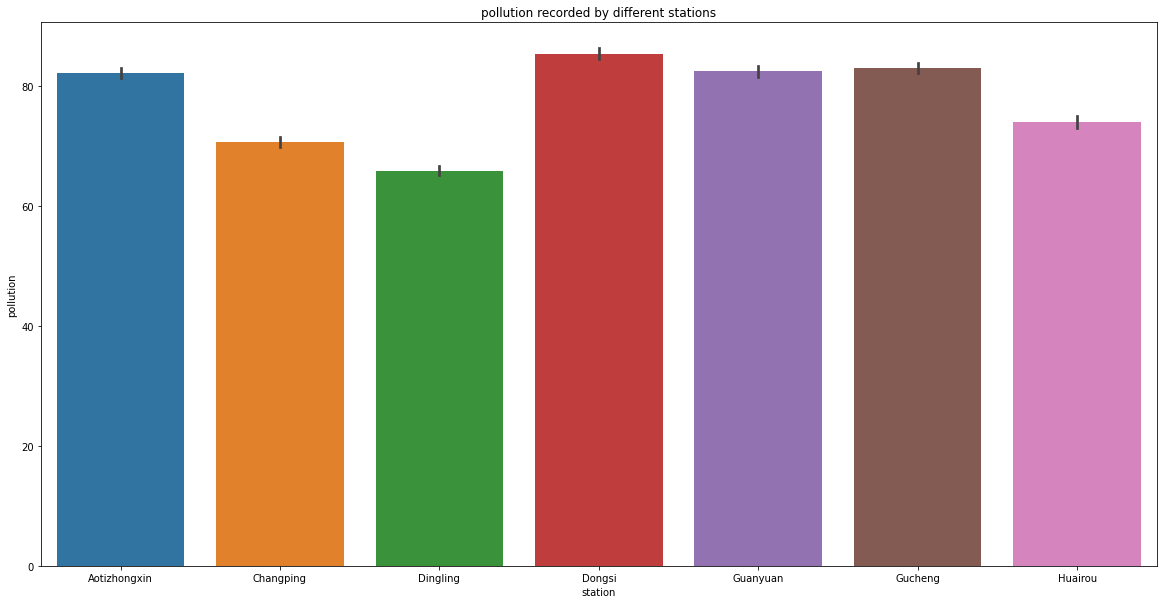

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='station', y='pollution', ax=ax)
ax.set(title='pollution recorded by different stations')

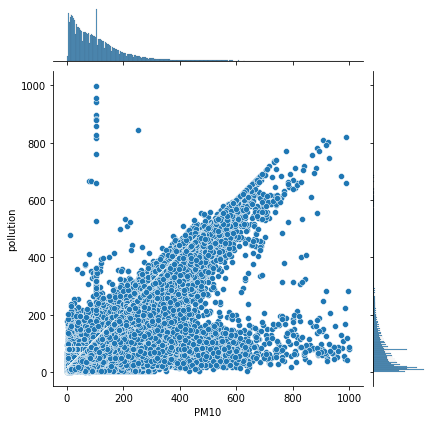

In [41]:
sns.jointplot(x='PM10',y='pollution',data=df,kind='scatter')

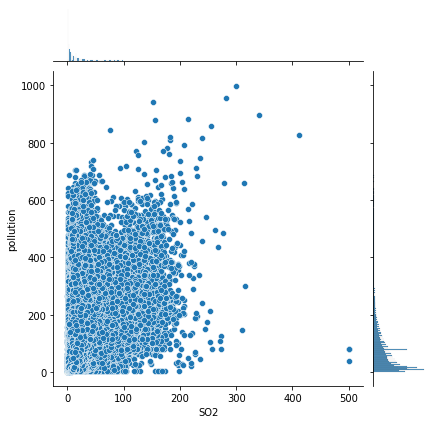

In [15]:
sns.jointplot(x='SO2',y='pollution',data=df,kind='scatter')

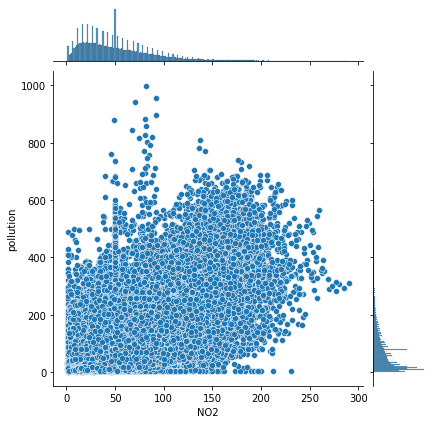

In [17]:
sns.jointplot(x='NO2',y='pollution',data=df,kind='scatter')

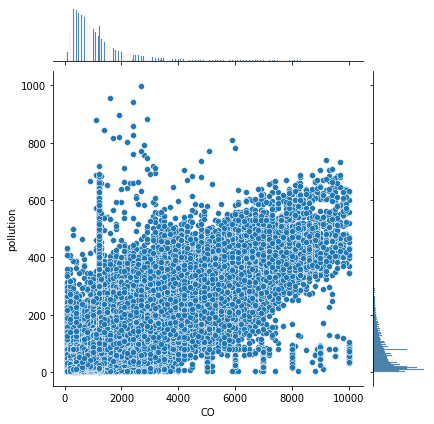

In [18]:
sns.jointplot(x='CO',y='pollution',data=df,kind='scatter')

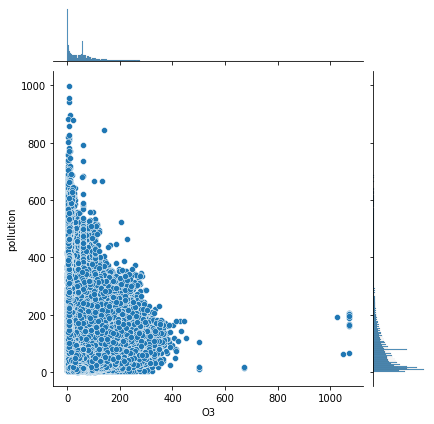

In [20]:
sns.jointplot(x='O3',y='pollution',data=df,kind='scatter')

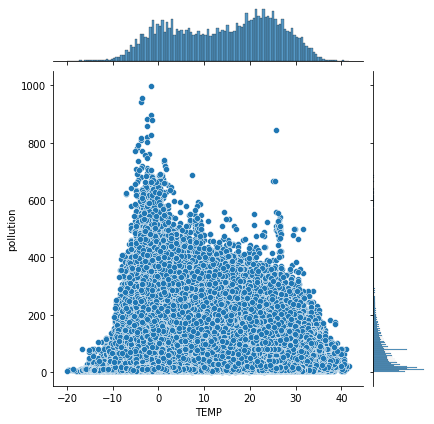

In [21]:
sns.jointplot(x='TEMP',y='pollution',data=df,kind='scatter')

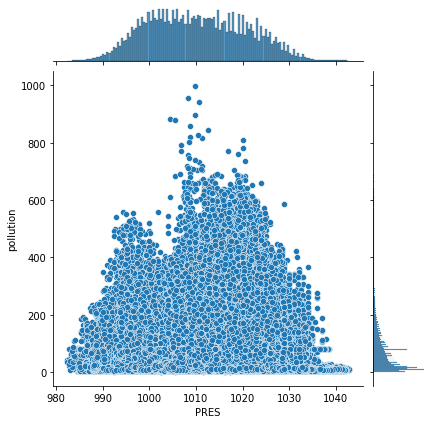

In [22]:
sns.jointplot(x='PRES',y='pollution',data=df,kind='scatter')

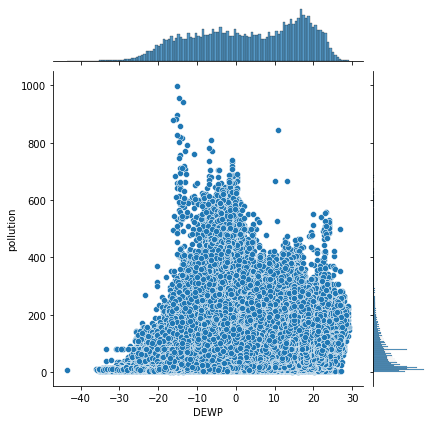

In [23]:
sns.jointplot(x='DEWP',y='pollution',data=df,kind='scatter')

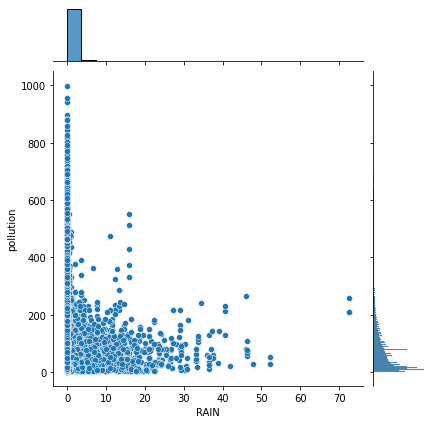

In [24]:
sns.jointplot(x='RAIN',y='pollution',data=df,kind='scatter')

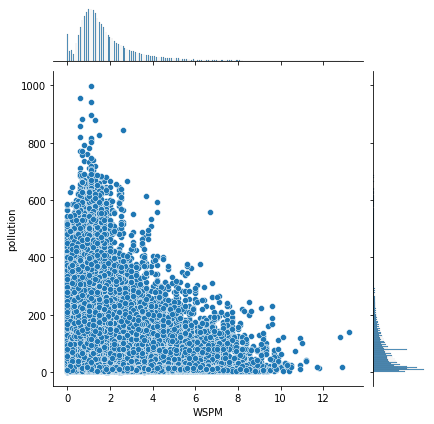

In [25]:
sns.jointplot(x='WSPM',y='pollution',data=df,kind='scatter')

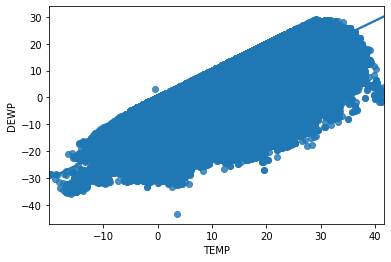

In [33]:
sns.regplot(x='TEMP',y='DEWP',data=df)

There is high multi-collinearity between TEMP and DEWP columns having a positive correlation of 81% as also visibile in above scatter plot.Hence,once of the features can be dropped.



# Data pre-processing

In [10]:
num.remove('pollution')


In [11]:
num

['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[(num)]=scaler.fit_transform(df[(num)])

In [13]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(data=df,columns=['year','month','day','hour','wd','station'],drop_first=True)

In [14]:
df.head()

,pollution,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,...,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
0,4.0,-1.122500,-0.549074,-1.259106,-0.833338,0.334888,-1.310374,1.241764,-1.613960,-0.080061,2.166883,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.0,-1.077518,-0.549074,-1.259106,-0.833338,0.334888,-1.345804,1.261111,-1.569902,-0.080061,2.408913,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.0,-1.088763,-0.502344,-1.171353,-0.833338,0.263937,-1.345804,1.290130,-1.569902,-0.080061,3.135005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.0,-1.100009,-0.221962,-1.142102,-0.833338,0.246199,-1.372377,1.386862,-1.658018,-0.080061,1.118085,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,-1.133746,-0.175232,-1.112851,-0.833338,0.246199,-1.425523,1.454574,-1.665360,-0.080061,0.230640,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df.drop(columns=['pollution'], axis=1)
y = df['pollution']

In [13]:
X.shape

(403776, 103)

In [14]:
y.shape

(403776,)

# Model train and test

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
    print('CV Score:', cv_score)

Model Report
RMSE: 30.50692410572197
CV Score: 30871581711.96866


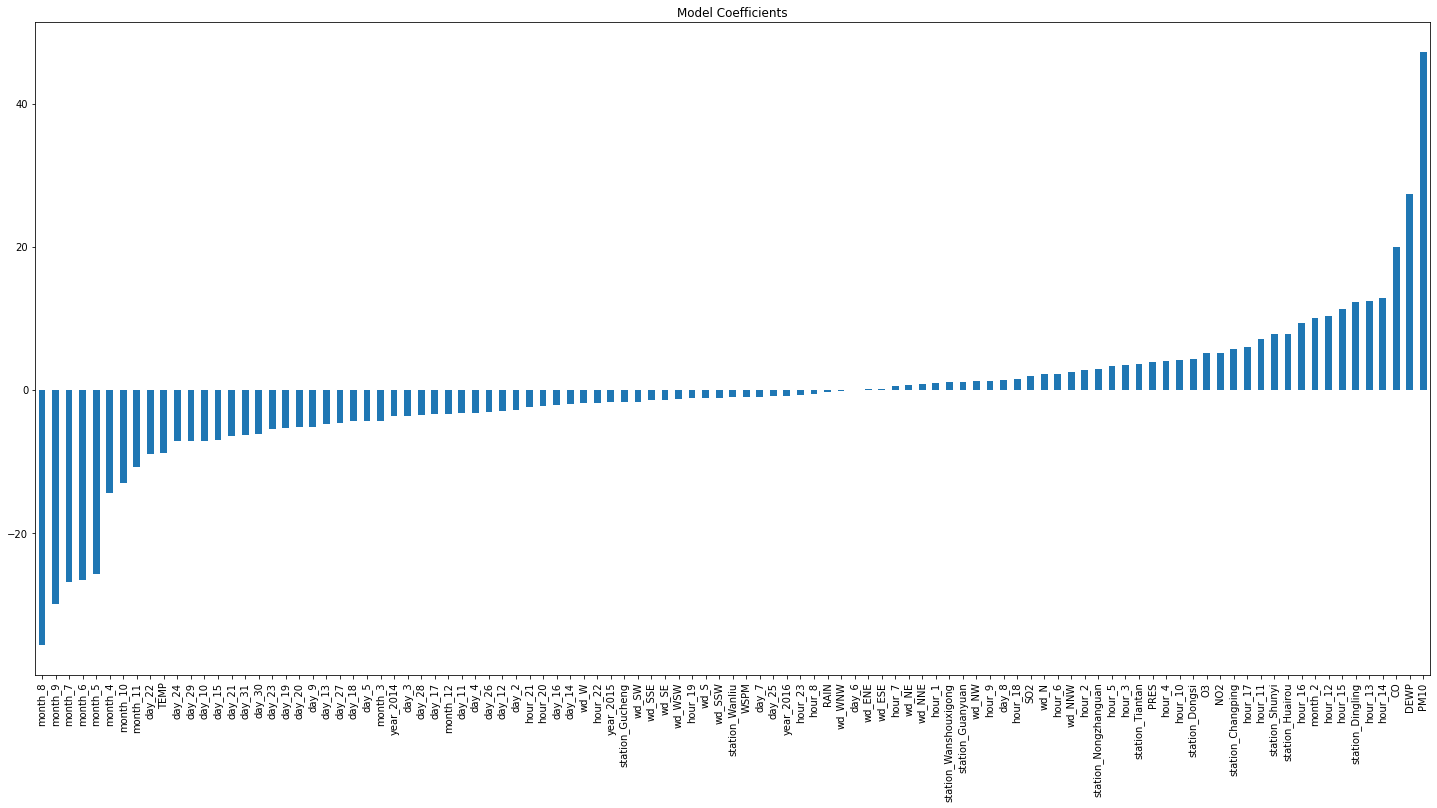

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Model Coefficients")



Model Report
RMSE: 30.50696011187328
CV Score: 30.979910981515253


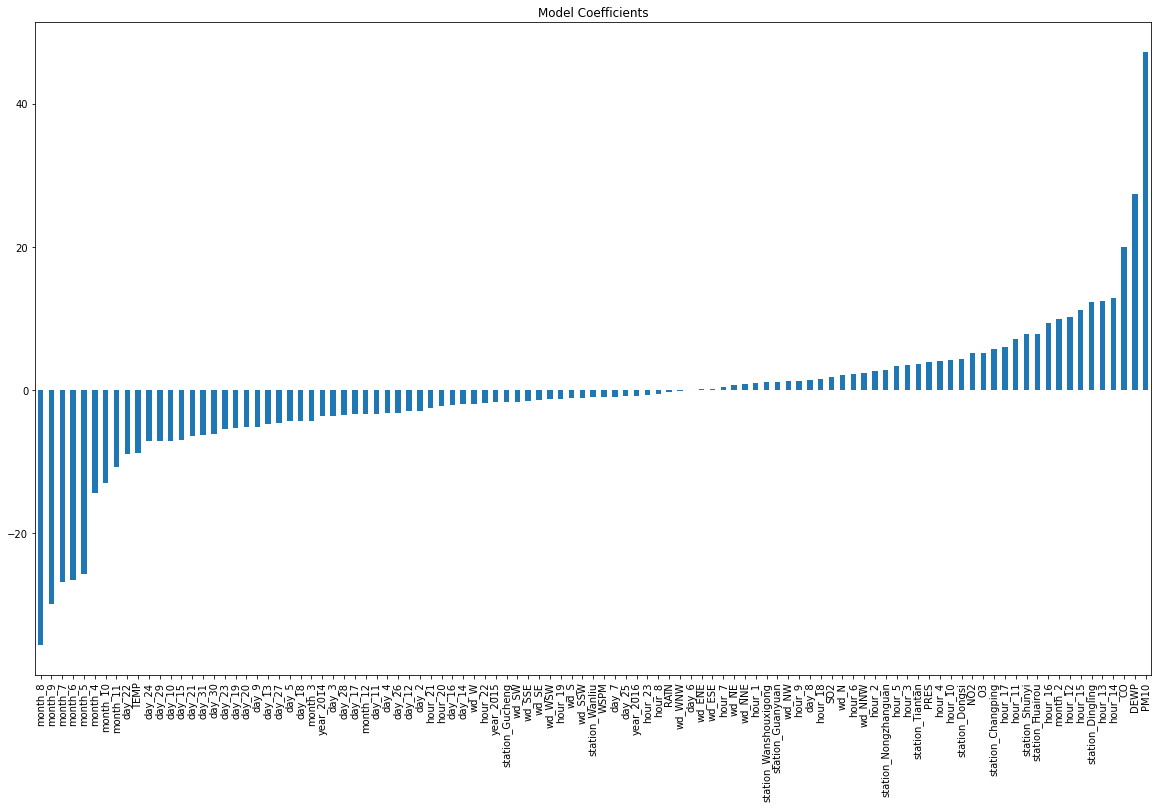

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Model Coefficients")

Model Report
RMSE: 32.16725264577513
CV Score: 32.317772859875745


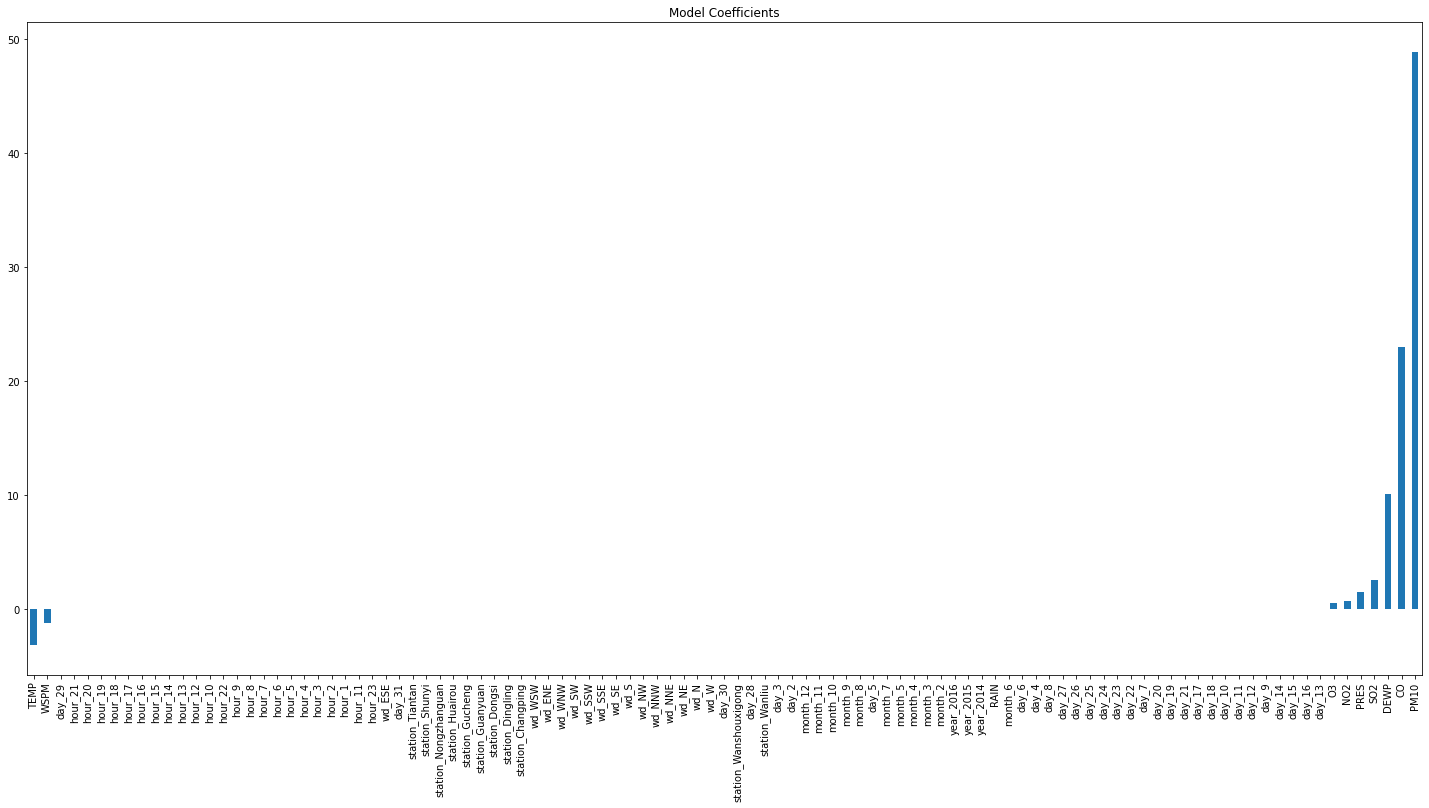

In [25]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Model Coefficients")

Model Report
RMSE: 26.12902578999663
CV Score: 28.305858377274138


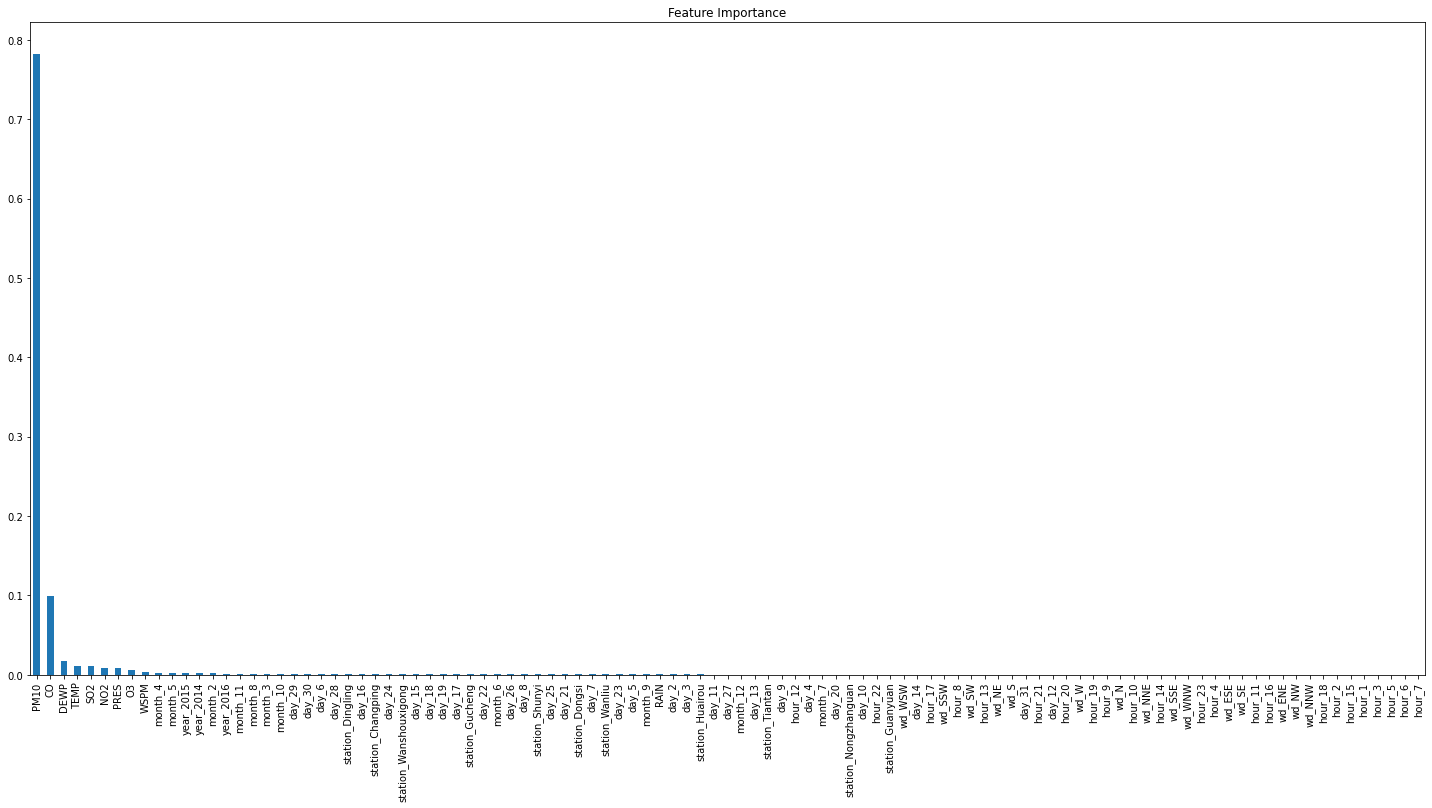

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 18.163288578115054
CV Score: 20.240987014386825


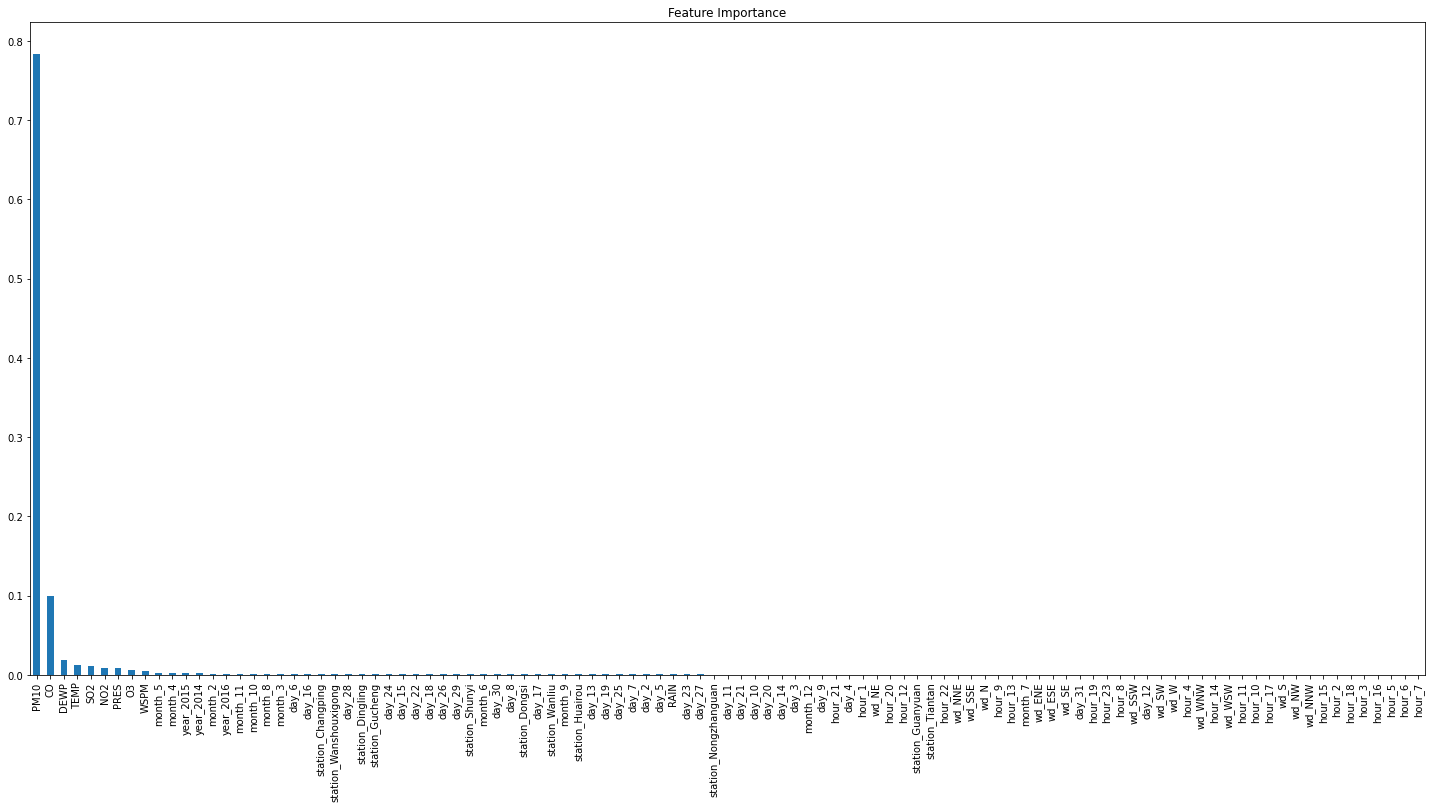

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Feature Importance")

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
model = ExtraTreesRegressor()
model.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

RMSE: 16.24658184990477


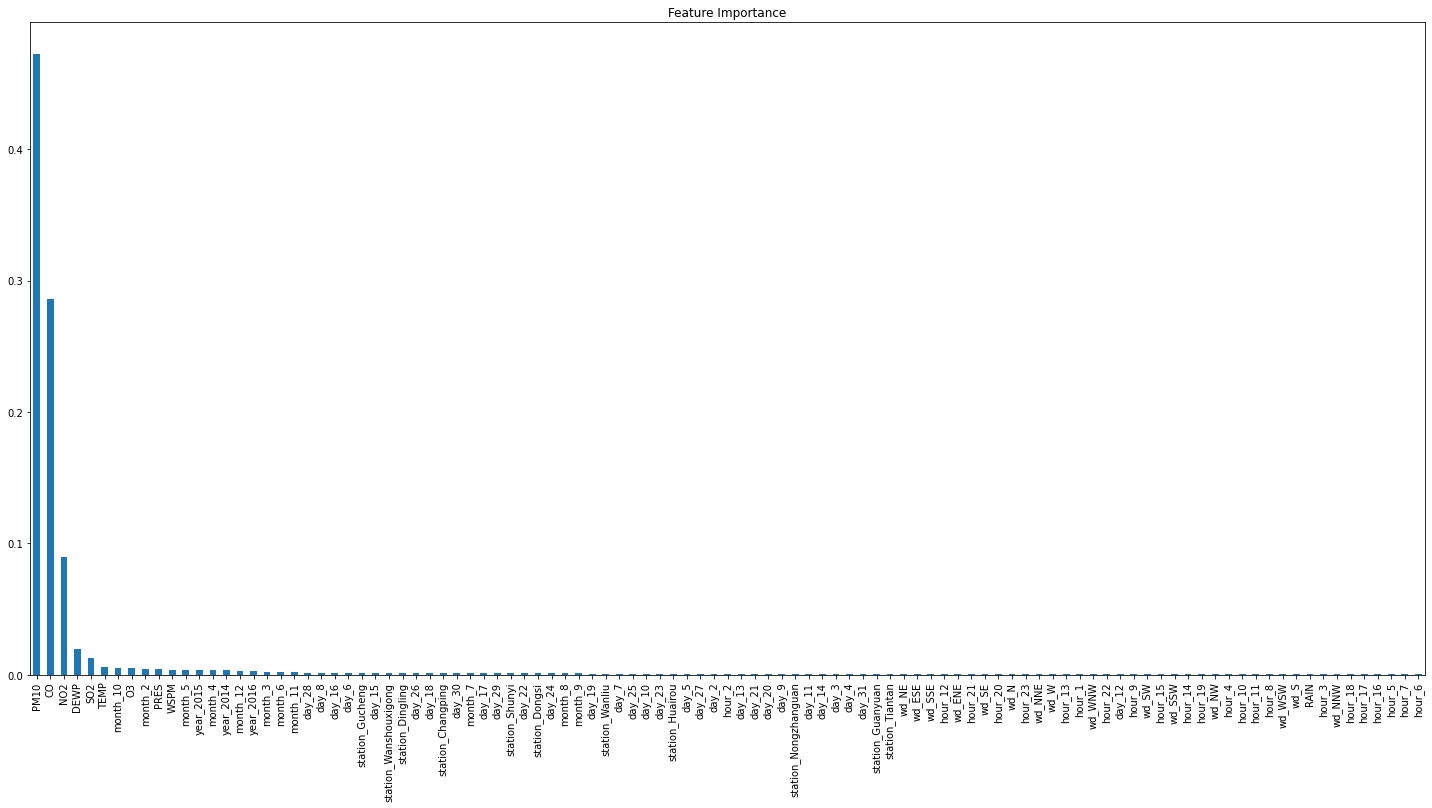

In [18]:
pred = model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Feature Importance")

Feature selection 


In [18]:
X = df[['PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
y = df['pollution']

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
model = ExtraTreesRegressor()
model.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

RMSE: 20.278021179220783


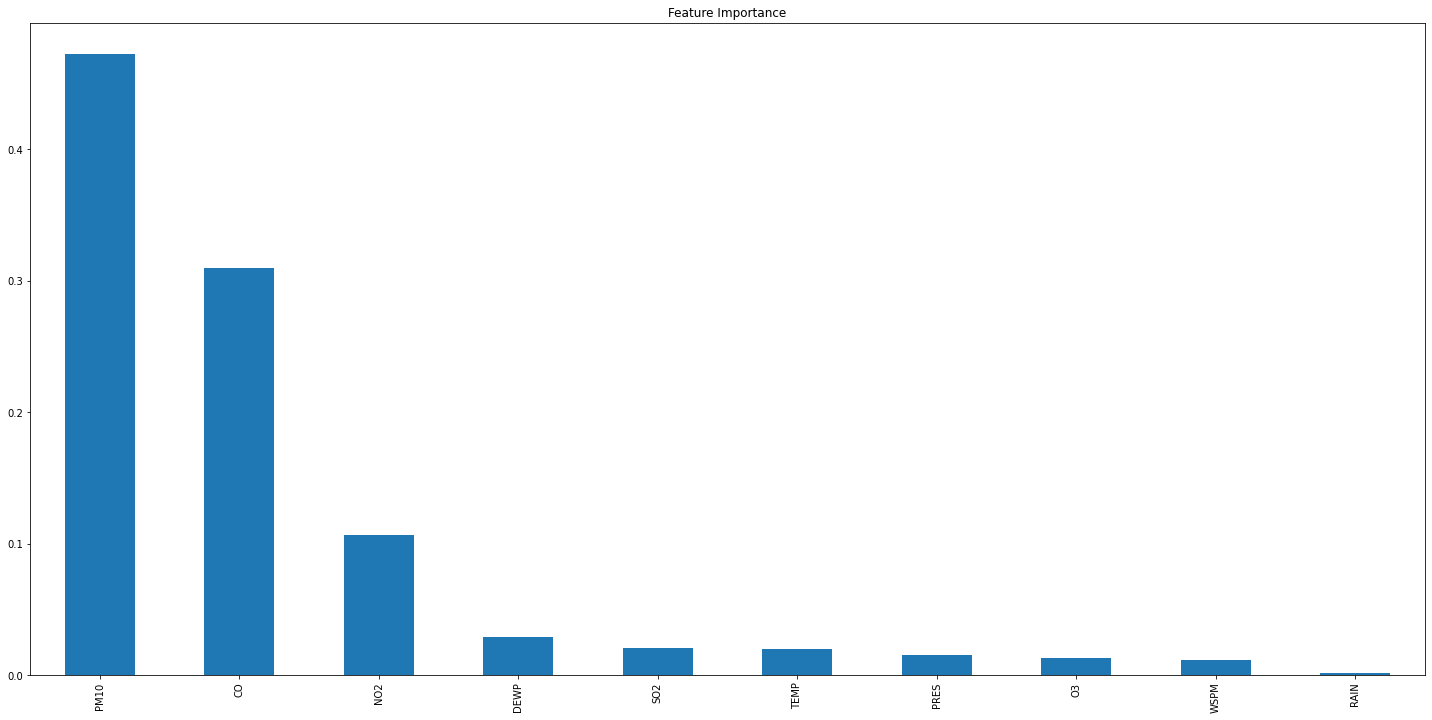

In [21]:
pred = model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Feature Importance")

In [15]:
df.drop(columns=['year','month','hour','wd'],inplace=True)

In [16]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(data=df,columns=['day','station'],drop_first=True)

In [17]:
df.head()

,pollution,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
0,4.0,-1.121745,-0.545676,-1.265500,-0.834929,0.334502,-1.308773,1.228341,-1.612998,-0.080055,2.166794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.0,-1.077022,-0.545676,-1.265500,-0.834929,0.334502,-1.344171,1.247659,-1.568922,-0.080055,2.409199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.0,-1.088203,-0.499168,-1.177928,-0.834929,0.263635,-1.344171,1.276635,-1.568922,-0.080055,3.136413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.0,-1.099384,-0.220123,-1.148737,-0.834929,0.245919,-1.370720,1.373222,-1.657075,-0.080055,1.116372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,-1.132926,-0.173616,-1.119546,-0.834929,0.245919,-1.423819,1.440832,-1.664421,-0.080055,0.227554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df.drop(columns=['pollution'], axis=1)
y = df['pollution']

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
model = ExtraTreesRegressor()
model.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

RMSE: 18.140130061155613


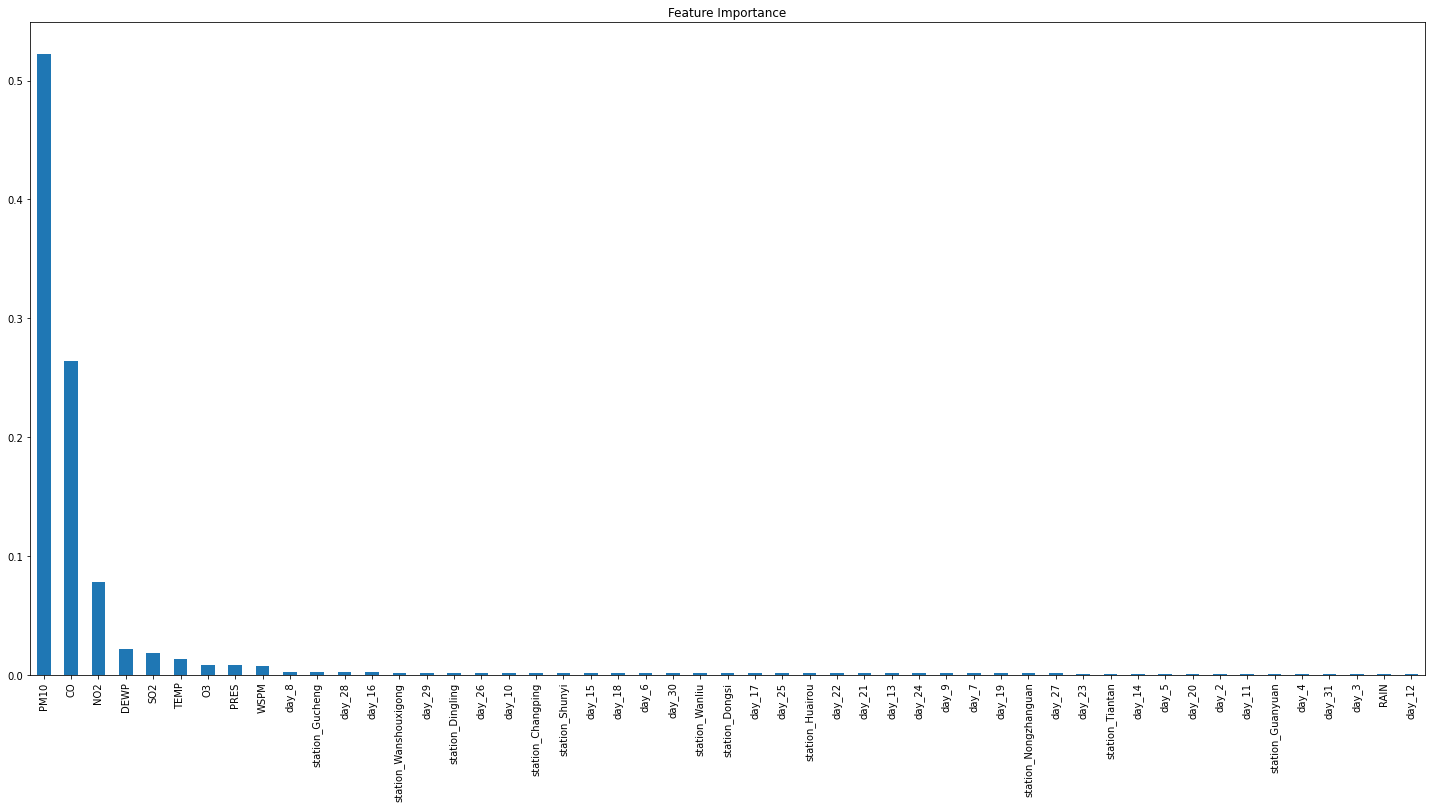

In [22]:
pred = model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(25,12))
coef.plot(kind='bar', title="Feature Importance")

# Test set prediction

In [23]:
df1=pd.read_csv('beijing_test.csv')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REF_NO   16728 non-null  int64  
 1   year     16728 non-null  int64  
 2   month    16728 non-null  int64  
 3   day      16728 non-null  int64  
 4   hour     16728 non-null  int64  
 5   PM10     16728 non-null  float64
 6   SO2      16728 non-null  float64
 7   NO2      16728 non-null  float64
 8   CO       16728 non-null  float64
 9   O3       16728 non-null  float64
 10  TEMP     16728 non-null  float64
 11  PRES     16728 non-null  float64
 12  DEWP     16728 non-null  float64
 13  RAIN     16728 non-null  float64
 14  wd       16728 non-null  object 
 15  WSPM     16728 non-null  float64
 16  station  16728 non-null  object 
dtypes: float64(10), int64(5), object(2)
memory usage: 2.2+ MB


In [25]:
df1.drop(columns='REF_NO',inplace=True)

In [27]:
df1.drop(columns=['year','month','hour','wd'],inplace=True)

In [28]:
# change int columns to category
cols = ['day','station']

for col in cols:
    df1[col] = df1[col].astype('category')


In [29]:
num2=['PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

In [30]:
df1[(num2)]=scaler.transform(df1[(num2)])

In [32]:
from sklearn.preprocessing import OneHotEncoder
df1 = pd.get_dummies(data=df1,columns=['day','station'],drop_first=True)

In [33]:
df1.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
0,4.379204,-0.359646,2.062245,4.458425,-0.958811,-1.662760,1.141413,-0.680047,-0.080055,-0.580463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.390385,-0.406153,1.828719,4.640954,-0.958811,-1.707009,1.160730,-0.702085,-0.080055,-0.822868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.077323,-0.406153,1.770338,4.549690,-0.958811,-1.724708,1.180048,-0.709431,-0.080055,-0.499661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.585368,-0.452661,1.711956,4.275895,-0.976528,-1.707009,1.180048,-0.687393,-0.080055,-0.499661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.066142,-0.266631,2.120626,5.918661,-0.746212,-1.689310,1.122096,-0.658009,-0.080055,-0.580463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
Z=df1.values

In [35]:
Final_pred = model.predict(Z)

In [36]:
prediction = pd.DataFrame(Final_pred).to_csv('submission.csv')